## WORKING WITH CATEGORICAL DATA IN PYTHON

- A variable is considered "Categorical" if it contains a finite number of distict groups.
- It is also known as qualitative data

1) Ordinal Data:
- Categorical data that has a natural order

2) Nominal Data:
- Categorical Variables that cannot be placed into a natural order

- An "Object" Datatype is how pandas stores strings and is a good indicator that the data is a string



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

adult = pd.read_csv('Datasets/adult.csv')
print(adult.info())
print("\n")

# Exploring the marital status column in detail
print(adult["marital.status"].describe())
print("\n")
print(adult["marital.status"].value_counts())
# The output will contain RELATIVE FREQUENCIES if we set normalize = True
print("\n")
print(adult["marital.status"].value_counts(normalize = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


count                  32561
unique                     7
top       Married-civ-spouse

- Pandas uses "O" to represent the Object datatype

In [72]:
# Data types of each column
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [73]:
# Using the dtype property on the marital status column as we are working with a series and not a dataframe
print(adult["marital.status"].dtype)

# Converting it to the Categorcal data type
adult["marital.status"] = adult["marital.status"].astype("category")
print(adult["marital.status"].dtype)

object
category


In [74]:
# Creating a categorical series
my_data = ["A", "A", "C", "B", "C", "A"]

# METHIOD 1
myseries1 = pd.Series(my_data, dtype = "category")
print(myseries1)

# METHOD 2 - This method allows us to show that the categories hav a logical order
myseries2 = pd.Categorical(my_data, categories=["C", "B", "A"], ordered = True)
myseries2

0    A
1    A
2    C
3    B
4    C
5    A
dtype: category
Categories (3, object): ['A', 'B', 'C']


['A', 'A', 'C', 'B', 'C', 'A']
Categories (3, object): ['C' < 'B' < 'A']

### Why do we use categorical?

- MEMORY
- If we know the datatypes of the column before using it, then we should specify them
- Steps to specify dtypes when reading data:
1) Create a dictionary
2) Set the dtype parameter


In [75]:
# Memory used when stored as an object data type
adult = pd.read_csv('Datasets/adult.csv')
print(adult["marital.status"].nbytes)

# Memory used when stored as an categorical data type
adult["marital.status"] = adult["marital.status"].astype("category")
print(adult["marital.status"].nbytes)

260488
32617


In [76]:
# SPECIFYING DTYPES WHEN READING DATA

# 1)Create a dictionary
adult_dtypes = {"marital.status":"category"}

# 2) Set the dtype parameter
adult = pd.read_csv('Datasets/adult.csv', dtype=adult_dtypes)
adult["marital.status"].dtype

CategoricalDtype(categories=['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
                  'Married-spouse-absent', 'Never-married', 'Separated',
                  'Widowed'],
, ordered=False, categories_dtype=object)

### Grouping Data by Category

In [ ]:
# using "by" parameter
groupby_object = adult.groupby("by = ['income']")

### Setting Category Variables

- 

In [ ]:
dogs = pd.read_csv("Datasets/ShelterDogs.csv")
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

### Setting Category Variables

- using the .cat accessor variable to access and manipulate the categories of the categorical variables

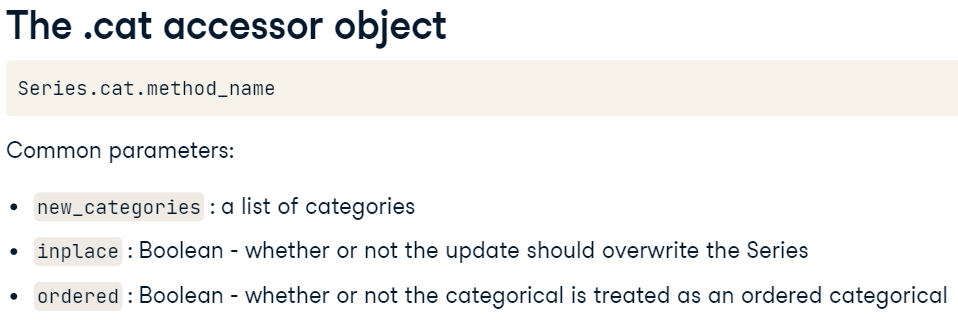



In [ ]:
# Converting the coat variable to category and checking its frequency distribution
dogs["coat"] = dogs["coat"].astype("category")
print(dogs["coat"].value_counts(dropna=False))
# cat.set_categories parameter is used to set specific categories
dogs["coat"] = dogs["coat"].cat.set_categories(new_categories=["short", "medium", "long"], ordered=True)
print(dogs["coat"].value_counts(dropna = False))
dogs['coat'].head(3)

coat
short     1972
medium     565
NaN        220
long       180
Name: count, dtype: int64
coat
short     1972
medium     565
NaN        220
long       180
Name: count, dtype: int64


0    short
1    short
2    short
Name: coat, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [ ]:
# MISSING CATEGORIES

dogs['likes_people'].value_counts(dropna=False)

# Adding categoriess
dogs['likes_people'] = dogs['likes_people'].astype("category")
dogs['likes_people'] = dogs['likes_people'].cat.add_categories(new_categories=["did not check", "could not tell"])
print(dogs['likes_people'].cat.categories)

# Removing categories
dogs['likes_people'] = dogs['likes_people'].cat.remove_categories(removals=["wirehaired"])
print(dogs['likes_people'].cat.categories)


### Updating Categories

Common Replacement issues:
- must use new category names
- cannot collapse two categories into one using the rename_categories method

Collapsing Categories
- The .replace method does not preserve the categorical data type. The data type of the new column is an object data type and not category


In [83]:
# UPDATING CATEGORIES
dogs['breed'] = dogs['breed'].astype("category")
print(dogs['breed'].value_counts())

# Renaming categories
# Syntax: Series.cat.rename_categories(new_categories = dict)
# 1) make a dictionary
my_changes = {"Unknown Mix" : "Unknown"}
# 2) Rename the category
dogs['breed'] = dogs['breed'].cat.rename_categories(my_changes)
print("\n", dogs['breed'].value_counts())

# Renaming categories with a function
dogs['sex'] = dogs['sex'].astype("category")
dogs['sex'] = dogs['sex'].cat.rename_categories(lambda c:c.title())
print("\n", dogs['sex'].cat.categories)

# Collapsing categories
dogs['color'] = dogs['color'].astype("category")
print(dogs['color'].cat.categories)
# 1) craete a dictionary and use .replace 
update_colors = {
    "black and brown" : "black",
    "black and tan" : "black",
    "black and white" : "black"
}
dogs['main color'] = dogs['color'].replace(update_colors)
dogs['main color'] = dogs['main color'].astype("category")
dogs['main color'].cat.categories

breed
Unknown                                     1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: count, Length: 277, dtype: int64

 breed
Unknown                                     1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhoun

### Redordering Categories

- We may reorder the variables so that the analysis are displayed in a certain order


In [ ]:
# REORDERING VARIABLES
dogs['coat'] = dogs['coat'].cat.reorder_categories(new_categories=['short', 'medium', 'wirehaired', 'long'], ordered = True)
# Using the inplace method
dogs['coat'].cat.reorder_categories(new_categories=['short', 'medium', 'wirehaired', 'long'], ordered = True, inplace = True)

### Cleaning and accessing data

Possible Issues with Categorical Data:
1) inconsistent values:
- eg: "Ham", "ham", " Ham"
2) Mispelled values:
- eg: "hma", "Hma"
3) Wrong datatype for the column i.e. the column is not category data type

Identifying Issues:
- use either Series.cat.categories to see all categories or Series.value_counts()

In [84]:
# Identifying issues in categorical data
dogs['get_along_cats'].value_counts()

get_along_cats
yes    275
no     156
Name: count, dtype: int64

### Fixing Issues

1) Removing Whitespace
dogs['get_along_cats'] = dogs['get_along_cats'].str.strip()

2) Capitalization
dogs['get_along_cats'] = dogs['get_along_cats'].str.title()


3) Mispelled Words
- fixing with .replace
- The column will be converted to an object datatype

In [ ]:
# 1) Removing Whitespace
dogs['get_along_cats'] = dogs['get_along_cats'].str.strip()

# 2) Capitalization
dogs['get_along_cats'] = dogs['get_along_cats'].str.title()

# 3) Mispelled Words
replace_map = {"Noo" : "No"}
dogs['get_along_cats'].replace(replace_map, inplace=True)
dogs['get_along_cats'] = dogs['get_along_cats'].astype('category')

### Using the str accessor object

- Searching for a string

In [87]:
# Searching for a string
# We set the regex(regular expression) to false so that we use string matching and not regular expression
dogs['breed'].str.contains("Shepherd", regex = False)

# Accessing data with loc
dogs.loc[dogs['get_along_cats'] == "Yes", "size"].value_counts(sort = False)

Series([], Name: count, dtype: int64)

### Categorical Plots using Seaborn

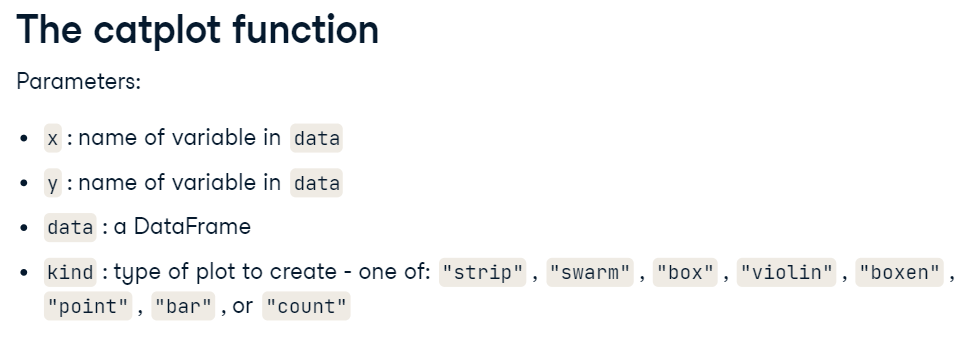

In [89]:
# Importing dataset
reviews = pd.read_csv('Datasets/lasvegas_tripadvisor.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

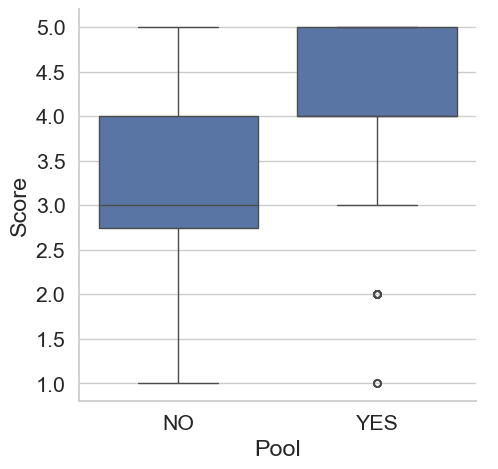

In [92]:
# Understanding the score column
reviews['Score'].value_counts()

sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(data = reviews, x = "Pool", y = "Score", kind = "box")
plt.show()

<Axes: xlabel='Traveler type'>

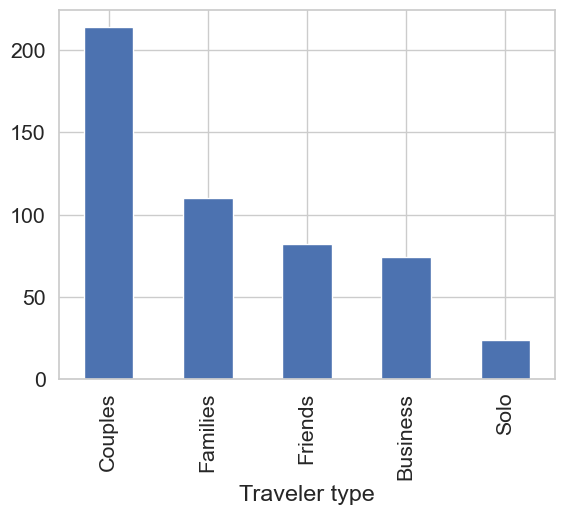

In [93]:
# Traditional Bar Chart
reviews["Traveler type"].value_counts().plot.bar()

### Bar Plots
- The height of each bar is an estimate of the mean of the data
- The black band represents the confidence interval for that column
- The intervals roughly represent a range of values we are 95% confident that the true mean of the data will fall into 

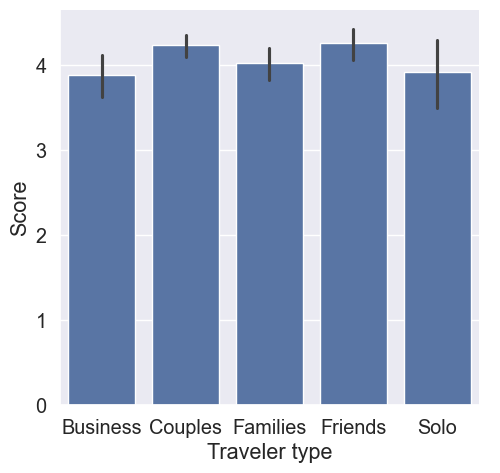

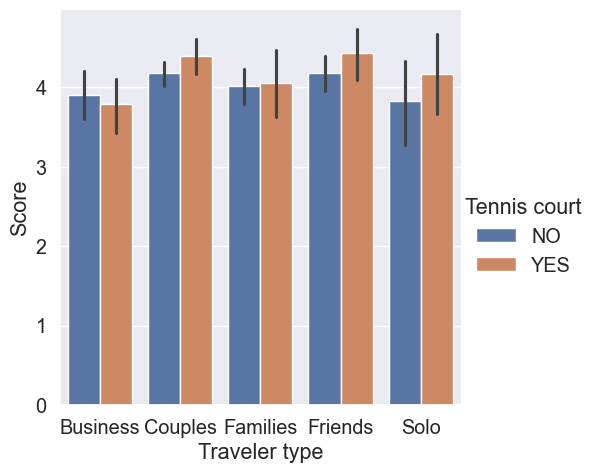

In [99]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
sns.catplot(data = reviews, x = "Traveler type", y = "Score", kind = "bar")
plt.show()

# Ordering Categories
reviews["Traveler type"] = reviews["Traveler type"].astype("category")
reviews["Traveler type"].cat.categories

# Bar Plot across two parameters
sns.catplot(x = "Traveler type", y = "Score", data = reviews, kind = "bar", hue = "Tennis court")
plt.show()

# Reordering Categories
# Syntax: reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories = continent_categories)



# Point and Count Plots

- Vertical blue lines in point plots show the confidence intervals


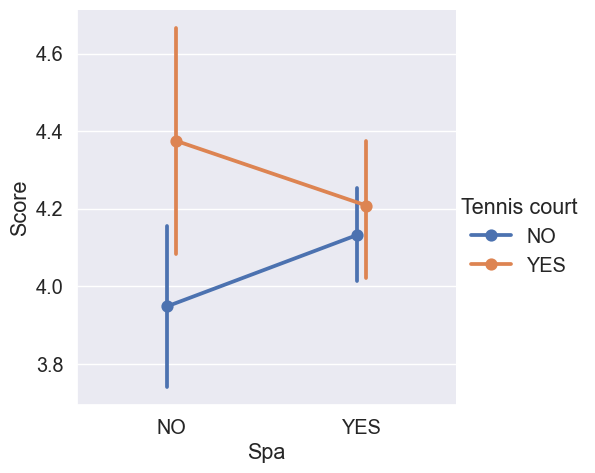

C:\Users\meetb\AppData\Local\Temp\ipykernel_36116\2096522717.py:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data = reviews, x = "Score", y = "Review weekday", kind = "point", join = False)


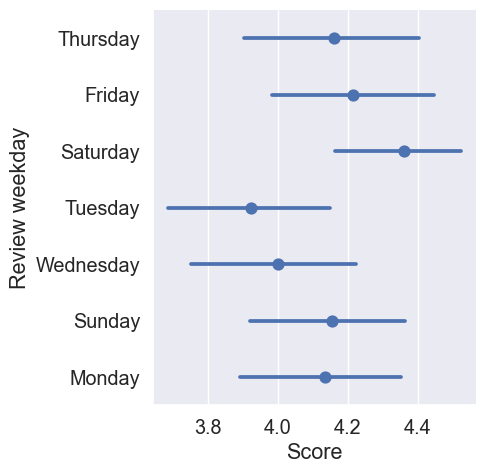

In [107]:
# Looking at the review scores based on if the hotel has a pool or not

sns.catplot(data = reviews, x = "Spa", y = "Score", kind = "point", hue = "Tennis court", dodge = True)
plt.show()

# Turning the join parameter to False
sns.catplot(data = reviews, x = "Score", y = "Review weekday", kind = "point", join = False)
plt.show()


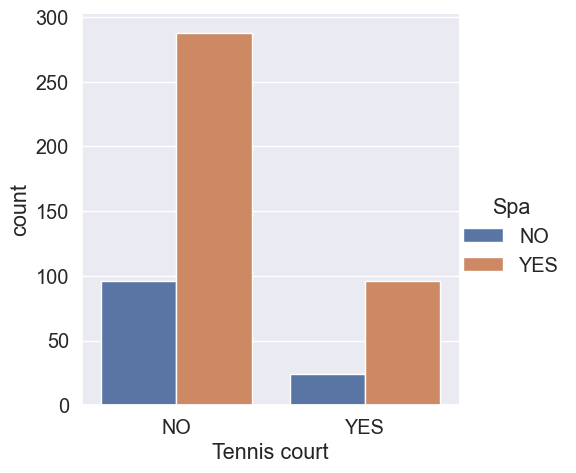

In [109]:
# COUNT PLOT

sns.catplot(data = reviews, x = "Tennis court", kind = "count", hue = "Spa")
plt.show()

### Additional catplot() options

C:\Users\meetb\AppData\Local\Temp\ipykernel_36116\3984553042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(x = "Traveler type", kind = "count",col = "User continent", col_wrap = 3, palette = sns.color_palette("Set1"), data = reviews )
C:\Users\meetb\AppData\Local\Temp\ipykernel_36116\3984553042.py:4: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  ax = sns.catplot(x = "Traveler type", kind = "count",col = "User continent", col_wrap = 3, palette = sns.color_palette("Set1"), data = reviews )


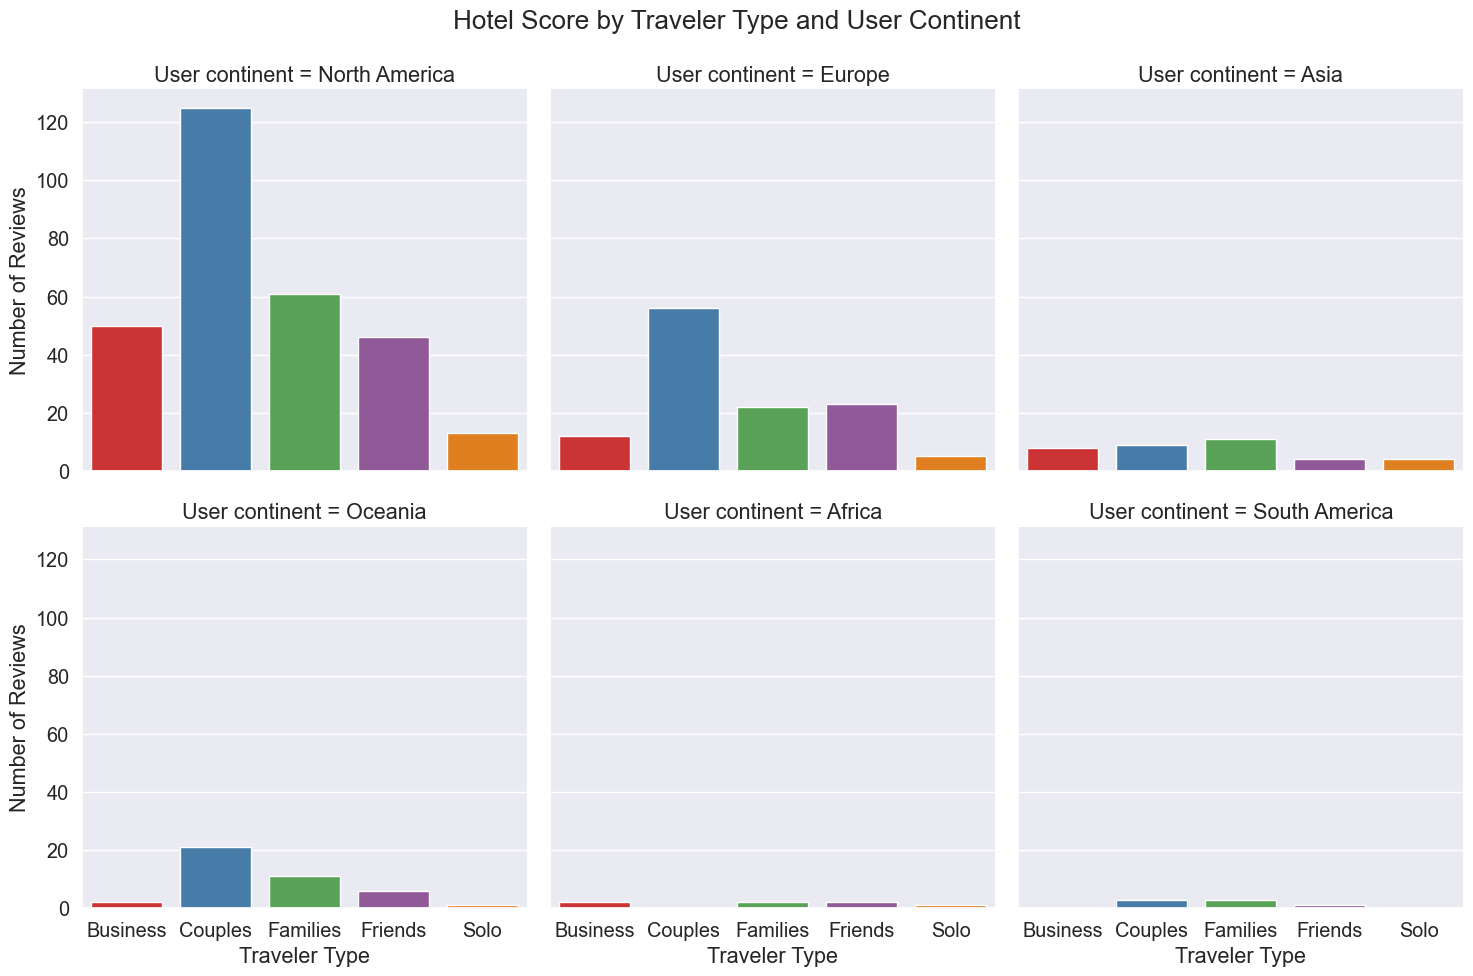

In [114]:
# Using the facet grid
# col: Specifies which column's categories are to be used to make the different graphs
# col_wrap: Determines the number of graphs in one line
ax = sns.catplot(x = "Traveler type", kind = "count",col = "User continent", col_wrap = 3, palette = sns.color_palette("Set1"), data = reviews )
ax.fig.suptitle("Hotel Score by Traveler Type and User Continent")
ax.set_axis_labels("Traveler Type", "Number of Reviews")
plt.subplots_adjust(top = 0.9)

In [116]:
used_cars = pd.read_csv('Datasets/cars.csv')
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

### Categorical Pitfalls

1) Memory 

- Categorical datatype is not always the most effective way to store data in the memory.
- If we convert a numerical column or a categorical column with a lot of different values, then we have very little memory savings
- The number of bytes needed in memory for a categorical column is proportional to the number of categories

In [119]:
# CATEGORICAL PITFALLS
print(used_cars['odometer_value'].astype('object').describe(), "\n")
print(f"As float: {used_cars['odometer_value'].nbytes}")
print(f"As category: {used_cars['odometer_value'].astype("category").nbytes}")

count      38531
unique      6063
top       300000
freq        1794
Name: odometer_value, dtype: int64 

As float: 308248
As category: 125566


2) the .str accessor object and .apply() method will always output a new Series object and convert category datatype to a Series datatype

- Solution: Covert the Series back to categorical data type

3) Common methods of adding, removing, replacing or setting categories do not all handle missing categories the same way

4) Numpy functions do not work with categorical Series

In [121]:
# 2) Converting Series Objects back to categorical data type

used_cars['color'] = used_cars['color'].astype("category")
used_cars['color'] = used_cars['color'].str.upper()
print(used_cars['color'].dtype)
# Converting back to categorical data type
used_cars['color'] = used_cars['color'].astype("category")
print(used_cars['color'].dtype)

object
category


In [127]:
# 3) Look for missing values
# The values are converted to NaN which is a problem
used_cars["color"] = used_cars["color"].astype("category")
used_cars["color"] = used_cars["color"].cat.set_categories(["black", "silver", "blue"])
used_cars["color"].value_counts(dropna=False)


color
NaN       38531
black         0
silver        0
blue          0
Name: count, dtype: int64

In [132]:
used_cars['color'] = used_cars['color'].astype("category")
used_cars['number_of_photos'] = used_cars['number_of_photos'].astype("category")
# used_cars['number_of_photos'].sum()  # <- GIVES AN ERROR

# Solution:
used_cars['number_of_photos'].astype(int).sum()  

# The .str accessor can convert a Series to an Object data type which can use the .sum() method
used_cars['color'].str.contains("red")

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
38526    NaN
38527    NaN
38528    NaN
38529    NaN
38530    NaN
Name: color, Length: 38531, dtype: object

### Label Encoding

- Label encoding is a technique that codes categorical values as integers
- integers range from 0 through n-1, where n is the number of categories
- -1 code is reserved for missing values
- It is not the best encoding method for machine learning
- This method saves on memory and is often used in surveys
- If the column is not ordinal, then the codes will be assigned in alphabetical order


In [133]:
# Converting Manufacturer name to numerical data

used_cars['manufacturer_name'] = used_cars['manufacturer_name'].astype("category")
used_cars['manufacturer_code'] = used_cars['manufacturer_name'].cat.codes
used_cars[["manufacturer_name", "manufacturer_code"]]


,manufacturer_name,manufacturer_code
0,Subaru,45
1,Subaru,45
2,Subaru,45
3,Subaru,45
4,Subaru,45
...,...,...
38526,Chrysler,8
38527,Chrysler,8
38528,Chrysler,8
38529,Chrysler,8


#### Code Book / Data Dictionary

In [136]:
# Creating a code book

codes = used_cars['manufacturer_name'].cat.codes
categories = used_cars['manufacturer_name']

name_map = dict(zip(codes, categories))
print(name_map)

# Using a code book

# Reverting to previous values
used_cars['manufacturer_code'].map(name_map)

# 

{45: 'Subaru', 24: 'LADA', 12: 'Dodge', 54: 'УАЗ', 23: 'Kia', 35: 'Opel', 53: 'Москвич', 1: 'Alfa Romeo', 0: 'Acura', 10: 'Dacia', 27: 'Lexus', 33: 'Mitsubishi', 25: 'Lancia', 9: 'Citroen', 32: 'Mini', 21: 'Jaguar', 38: 'Porsche', 44: 'SsangYong', 11: 'Daewoo', 15: 'Geely', 50: 'ВАЗ', 13: 'Fiat', 14: 'Ford', 39: 'Renault', 42: 'Seat', 40: 'Rover', 48: 'Volkswagen', 28: 'Lifan', 22: 'Jeep', 5: 'Cadillac', 2: 'Audi', 52: 'ЗАЗ', 47: 'Toyota', 51: 'ГАЗ', 49: 'Volvo', 7: 'Chevrolet', 16: 'Great Wall', 4: 'Buick', 37: 'Pontiac', 29: 'Lincoln', 18: 'Hyundai', 34: 'Nissan', 46: 'Suzuki', 3: 'BMW', 30: 'Mazda', 26: 'Land Rover', 20: 'Iveco', 43: 'Skoda', 41: 'Saab', 19: 'Infiniti', 6: 'Chery', 17: 'Honda', 31: 'Mercedes-Benz', 36: 'Peugeot', 8: 'Chrysler'}


#### Boolean Coding

- Boolean code that represents a group of categories

In [137]:
# Boolean Code for all cars that were vans
used_cars['body_type'].str.contains("van", regex = False)

used_cars['Van_code'] = np.where(used_cars['body_type'].str.contains("van", regex = False), 1, 0)
used_cars['Van_code'].value_counts()

Van_code
0    34115
1     4416
Name: count, dtype: int64

#### Why not Label Encoding?

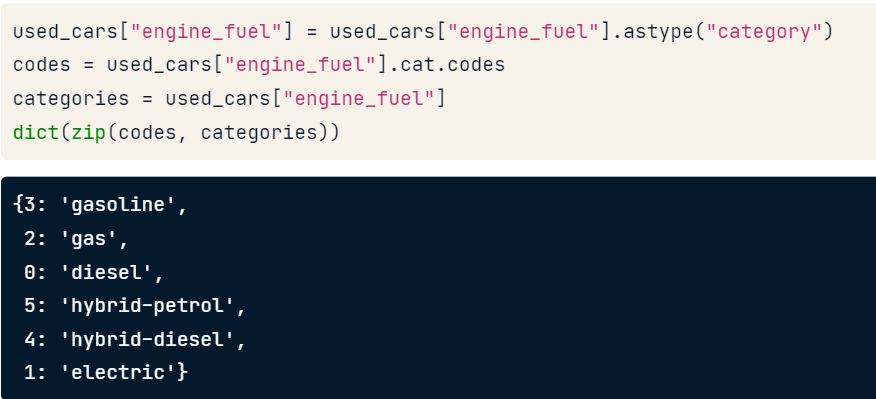

- The keys in label encoding are assigned accoring to the alphabetical order or according to the order of the categories if the data is ordinal
- If these are used in machine learning models, the model might misinterprit these numbers

### One Hot Encoding

- One hot encoding is the process of creating dummy variable
- The orignal column is dropped
- This might create too many features
- NaN values do not get their own column
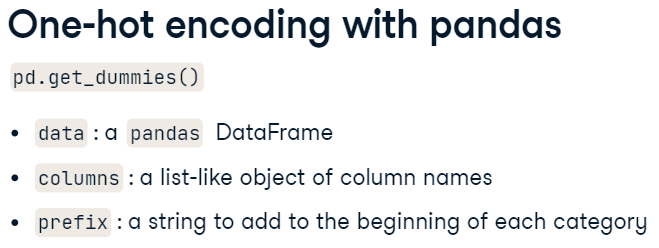

In [139]:
# ONE HOT ENCODING

used_cars = pd.read_csv('Datasets/cars.csv')
used_cars[["odometer_value", "color"]].head()

,odometer_value,color
0,190000,silver
1,290000,blue
2,402000,red
3,10000,blue
4,280000,black


In [142]:
used_cars_onehot = pd.get_dummies(used_cars[["odometer_value", "color"]])
print(used_cars_onehot.head())
print(used_cars_onehot.shape)

   odometer_value  color_black  color_blue  color_brown  color_green  \
0          190000        False       False        False        False   
1          290000        False        True        False        False   
2          402000        False       False        False        False   
3           10000        False        True        False        False   
4          280000         True       False        False        False   

   color_grey  color_orange  color_other  color_red  color_silver  \
0       False         False        False      False          True   
1       False         False        False      False         False   
2       False         False        False       True         False   
3       False         False        False      False         False   
4       False         False        False      False         False   

   color_violet  color_white  color_yellow  
0         False        False         False  
1         False        False         False  
2         False  

In [143]:
# Getting dummies on a subset of columns
used_cars_onehot = pd.get_dummies(used_cars, columns=["color"], prefix="")
used_cars_onehot.head()

,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,_brown,_green,_grey,_orange,_other,_red,_silver,_violet,_white,_yellow
0,Subaru,Outback,automatic,190000,2010,gasoline,False,gasoline,2.5,universal,...,False,False,False,False,False,False,True,False,False,False
1,Subaru,Outback,automatic,290000,2002,gasoline,False,gasoline,3.0,universal,...,False,False,False,False,False,False,False,False,False,False
2,Subaru,Forester,automatic,402000,2001,gasoline,False,gasoline,2.5,suv,...,False,False,False,False,False,True,False,False,False,False
3,Subaru,Impreza,mechanical,10000,1999,gasoline,False,gasoline,3.0,sedan,...,False,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,automatic,280000,2001,gasoline,False,gasoline,2.5,universal,...,False,False,False,False,False,False,False,False,False,False


In [144]:
print(used_cars_onehot.shape)

(38531, 41)
